In [1]:
import pandas as pd

In [2]:
#Read data into data frame
df_addresses = pd.read_csv('addresses.csv')
df_addresses.head()

,ADDR_ID,ADDRESS
0,98,"Studio 4, Mitchell prairie, Richardsonville, N..."
1,99,"90 Dean greens, South Margaretbury, JE1H 5FE"
2,117,"Flat 5, Morton view, Lake Jay, M85 8SF"
3,118,"Studio 37, Anna summit, North June, B2E 2JT"
4,93,"Flat 6, Ronald route, Patrickfort, CT76 4SX"


In [3]:
#Read data into data frame
df_listings = pd.read_csv('listings.csv')
#rename column to join them later
df_listings = df_listings.rename(columns={'RK':'ADDR_ID'})
df_listings.head()

,LISTING_ID,ADDRESS,UPDATE_DATE,LISTING_RK,ADDR_ID,LISTING_STATUS,BEDROOMS,PRICE,MESSAGE_TIMESTAMP
0,1640613,"417 Katy spur, Joshport, B1 9YL",2017-11-22,1,466,sold,2,280000.0,2023-10-31T15:53:54.951Z
1,1575862,"Flat 3, Nathan glens, New Arthurborough, CM23 1ZT",2018-01-08,3,463,for_sale,3,750000.0,2023-11-01T08:19:51.101Z
2,1575862,"Flat 3, Nathan glens, New Arthurborough, CM23 1ZT",2017-10-30,1,463,sale_under_offer,3,800000.0,2023-10-31T15:01:19.061Z
3,1575862,Flat 3,2018-05-02,2,463,for_sale,3,750000.0,2023-11-01T10:36:35.526Z
4,1567934,"Flat 97m, Lee forges, Aliceborough, OL63 9NS",2017-11-05,1,462,sold,3,575000.0,2023-10-31T15:53:54.951Z


In [4]:
#Join 2 data frames
df_fullset = df_addresses.join(df_listings, on = 'ADDR_ID', how='inner',lsuffix='_left', rsuffix='_right' )

In [5]:
df_fullset.head()

,ADDR_ID,ADDR_ID_left,ADDRESS_left,LISTING_ID,ADDRESS_right,UPDATE_DATE,LISTING_RK,ADDR_ID_right,LISTING_STATUS,BEDROOMS,PRICE,MESSAGE_TIMESTAMP
0,98,98,"Studio 4, Mitchell prairie, Richardsonville, N...",893167,"Studio 65, Harriet loop, Fletchermouth, SE5A 1RP",2018-05-29,3,366,sold,2,585000.0,2023-11-01T10:36:35.526Z
1,99,99,"90 Dean greens, South Margaretbury, JE1H 5FE",893167,"Studio 65, Harriet loop, Fletchermouth, SE5A 1RP",2018-02-09,1,366,for_sale,2,575000.0,2023-11-01T09:51:57.900Z
2,117,117,"Flat 5, Morton view, Lake Jay, M85 8SF",855406,"195 Ashleigh isle, Lake Leonardstad, EH6N 2XX",2020-11-19,3,349,sale_under_offer,3,400000.0,2023-11-02T11:40:23.079Z
3,118,118,"Studio 37, Anna summit, North June, B2E 2JT",851937,"Studio 7, Kerry locks, Danielleberg, CH1M 8AE",2020-11-20,1,337,sold,3,385000.0,2023-11-02T11:40:23.079Z
4,93,93,"Flat 6, Ronald route, Patrickfort, CT76 4SX",903288,"46 Adrian isle, North Douglas, E91 4GH",2020-08-13,3,372,sold,3,389950.0,2023-11-02T09:39:19.667Z


In [6]:
#Find the top 5 properties whose price has fluctuated the most during the listing.
result_df = (df_fullset
             .groupby('LISTING_ID')
             .agg(price_dif=('PRICE', lambda x: x.max() - x.min()))
             .reset_index()
             .sort_values(by='price_dif', ascending=False)
             .head(5))


In [7]:
result_df

,LISTING_ID,price_dif
74,703915,120000.0
16,510895,75000.0
113,1094801,50000.0
127,1575862,50000.0
3,487253,50000.0


In [8]:
#Join 2 data frames
df_price_changed = df_fullset.join(result_df, on='LISTING_ID', how='inner',lsuffix='_left')

In [9]:
#Select only rows which are in result_df data frame
df_price_changed = df_fullset[df_fullset['LISTING_ID'].isin(result_df['LISTING_ID'])]

In [10]:
#sort
df_price_changed = df_price_changed.sort_values(by=['LISTING_ID','UPDATE_DATE'])

In [11]:
df_price_changed.head()

,ADDR_ID,ADDR_ID_left,ADDRESS_left,LISTING_ID,ADDRESS_right,UPDATE_DATE,LISTING_RK,ADDR_ID_right,LISTING_STATUS,BEDROOMS,PRICE,MESSAGE_TIMESTAMP
452,453,453,"90 Jordan pine, Farmerport, PR12 1EU",487253,New Zoebury,2017-10-10,4,13,for_sale,3,700000.0,2023-10-31T15:01:19.061Z
445,446,446,"10 Joyce forge, Bethanmouth, N80 6EZ",487253,"776 Dale islands, New Zoebury, L31 0WD",2017-10-17,8,13,for_sale,3,650000.0,2023-10-31T15:01:19.061Z
448,449,449,"Studio 41, White street, East Mariabury, SW14 4RP",487253,"776 Dale islands, New Zoebury, L31 0WD",2018-02-02,7,13,sale_under_offer,3,650000.0,2023-11-01T09:51:57.900Z
446,447,447,"Flat 15Z, Williams pine, South Hayleychester, ...",487253,"776 Dale islands, New Zoebury, L31 0WD",2018-07-03,3,13,for_sale,3,650000.0,2023-11-01T10:55:39.648Z
449,450,450,"Studio 78g, Connor manor, East Naomi, B3S 7RB",487253,"776 Dale islands, New Zoebury, L31 0WD",2018-07-04,1,13,sale_under_offer,3,650000.0,2023-11-01T10:55:39.648Z


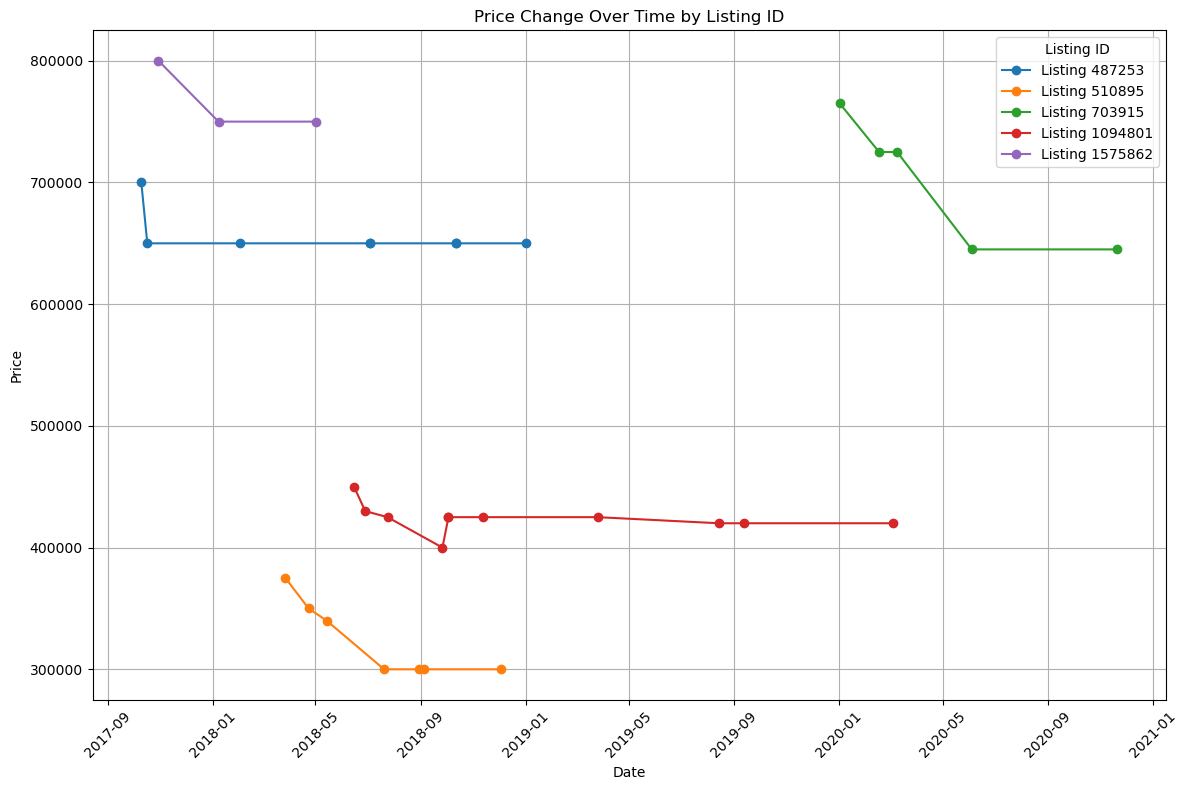

In [12]:
import matplotlib.pyplot as plt

# Extract relevant columns
df_relevant = df_price_changed[['LISTING_ID', 'PRICE', 'UPDATE_DATE']].copy()

# Convert 'UPDATE_DATE' to datetime
df_relevant['UPDATE_DATE'] = pd.to_datetime(df_relevant['UPDATE_DATE'])

# Drop rows with missing data points
df_relevant.dropna(subset=['PRICE'], inplace=True)

# Plotting
plt.figure(figsize=(12, 8))

# Group by 'LISTING_ID' and plot
for listing_id, group in df_relevant.groupby('LISTING_ID'):
    plt.plot(group['UPDATE_DATE'], group['PRICE'], marker='o', label=f'Listing {listing_id}')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Change Over Time by Listing ID')
plt.legend(title='Listing ID')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.tight_layout()  # Adjust layout to fit labels

# Show the plot
plt.show()


In [13]:
# Read the rates fron json and extract the latest
import json

def read_rates_json(file_path):
    rates = []
    with open('rates.json', 'r') as f:
        for line in f:
            rates.append(json.loads(line))
    return rates

# Load exchange rates
rates = read_rates_json('rates.json')

# Extract the latest rates
latest_rate = rates[-1]['rates']

In [14]:
latest_rate

{'GBP': 0.786895, 'EUR': 0.93105, 'AUD': 1.50123, 'ZAR': 18.04084, 'USD': 1}

In [15]:
latest_rate['GBP']

0.786895

In [16]:
#create a new dataframe
df_price_changed_USD = df_price_changed

In [17]:
# add column with the latest rates
df_price_changed_USD['rate_GBP'] = latest_rate['GBP']

In [18]:
df_price_changed_USD.head()

,ADDR_ID,ADDR_ID_left,ADDRESS_left,LISTING_ID,ADDRESS_right,UPDATE_DATE,LISTING_RK,ADDR_ID_right,LISTING_STATUS,BEDROOMS,PRICE,MESSAGE_TIMESTAMP,rate_GBP
452,453,453,"90 Jordan pine, Farmerport, PR12 1EU",487253,New Zoebury,2017-10-10,4,13,for_sale,3,700000.0,2023-10-31T15:01:19.061Z,0.786895
445,446,446,"10 Joyce forge, Bethanmouth, N80 6EZ",487253,"776 Dale islands, New Zoebury, L31 0WD",2017-10-17,8,13,for_sale,3,650000.0,2023-10-31T15:01:19.061Z,0.786895
448,449,449,"Studio 41, White street, East Mariabury, SW14 4RP",487253,"776 Dale islands, New Zoebury, L31 0WD",2018-02-02,7,13,sale_under_offer,3,650000.0,2023-11-01T09:51:57.900Z,0.786895
446,447,447,"Flat 15Z, Williams pine, South Hayleychester, ...",487253,"776 Dale islands, New Zoebury, L31 0WD",2018-07-03,3,13,for_sale,3,650000.0,2023-11-01T10:55:39.648Z,0.786895
449,450,450,"Studio 78g, Connor manor, East Naomi, B3S 7RB",487253,"776 Dale islands, New Zoebury, L31 0WD",2018-07-04,1,13,sale_under_offer,3,650000.0,2023-11-01T10:55:39.648Z,0.786895


In [19]:
#calculate the price in USD
df_price_changed_USD['PRICE_USD'] = df_price_changed_USD['PRICE'] * df_price_changed_USD['rate_GBP']

In [20]:
df_price_changed_USD.head()

,ADDR_ID,ADDR_ID_left,ADDRESS_left,LISTING_ID,ADDRESS_right,UPDATE_DATE,LISTING_RK,ADDR_ID_right,LISTING_STATUS,BEDROOMS,PRICE,MESSAGE_TIMESTAMP,rate_GBP,PRICE_USD
452,453,453,"90 Jordan pine, Farmerport, PR12 1EU",487253,New Zoebury,2017-10-10,4,13,for_sale,3,700000.0,2023-10-31T15:01:19.061Z,0.786895,550826.50
445,446,446,"10 Joyce forge, Bethanmouth, N80 6EZ",487253,"776 Dale islands, New Zoebury, L31 0WD",2017-10-17,8,13,for_sale,3,650000.0,2023-10-31T15:01:19.061Z,0.786895,511481.75
448,449,449,"Studio 41, White street, East Mariabury, SW14 4RP",487253,"776 Dale islands, New Zoebury, L31 0WD",2018-02-02,7,13,sale_under_offer,3,650000.0,2023-11-01T09:51:57.900Z,0.786895,511481.75
446,447,447,"Flat 15Z, Williams pine, South Hayleychester, ...",487253,"776 Dale islands, New Zoebury, L31 0WD",2018-07-03,3,13,for_sale,3,650000.0,2023-11-01T10:55:39.648Z,0.786895,511481.75
449,450,450,"Studio 78g, Connor manor, East Naomi, B3S 7RB",487253,"776 Dale islands, New Zoebury, L31 0WD",2018-07-04,1,13,sale_under_offer,3,650000.0,2023-11-01T10:55:39.648Z,0.786895,511481.75


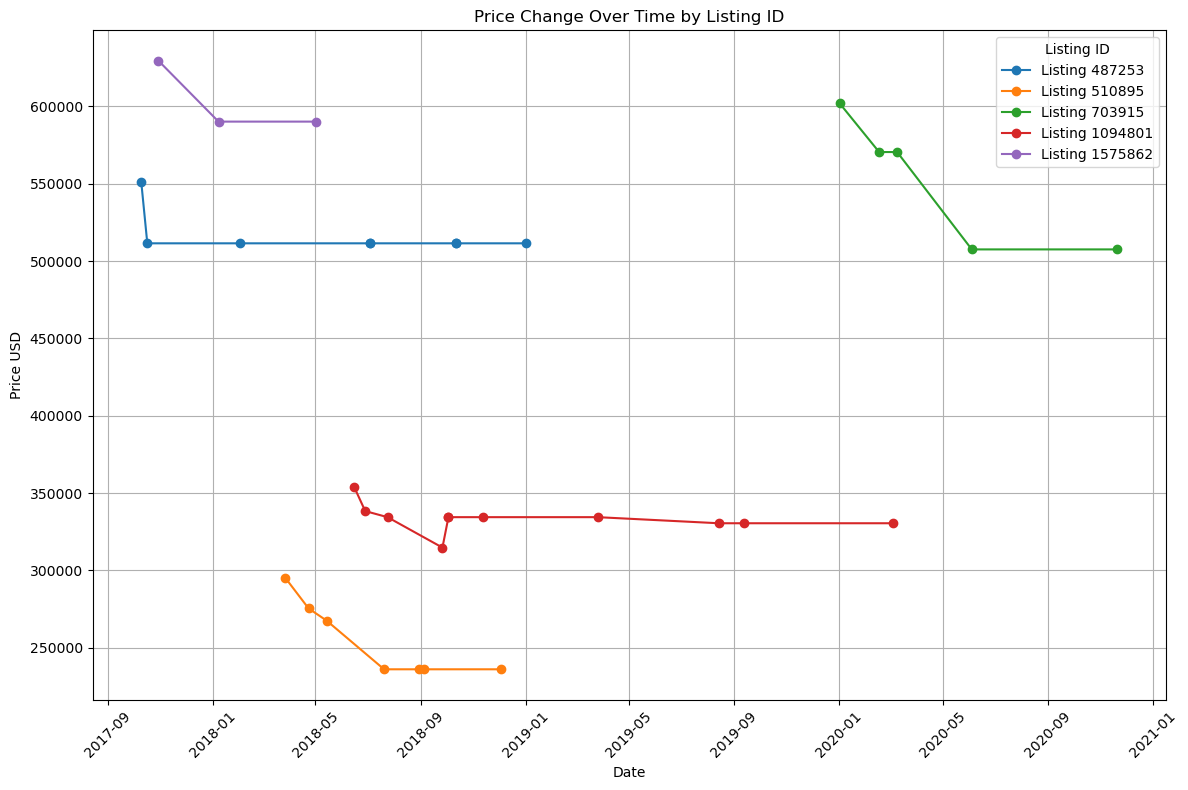

In [21]:
import matplotlib.pyplot as plt

# Extract relevant columns
df_relevant = df_price_changed_USD[['LISTING_ID', 'PRICE_USD', 'UPDATE_DATE']].copy()

# Convert 'UPDATE_DATE' to datetime
df_relevant['UPDATE_DATE'] = pd.to_datetime(df_relevant['UPDATE_DATE'])

# Drop rows with missing data points
df_relevant.dropna(subset=['PRICE_USD'], inplace=True)

# Plotting
plt.figure(figsize=(12, 8))

# Group by 'LISTING_ID' and plot
for listing_id, group in df_relevant.groupby('LISTING_ID'):
    plt.plot(group['UPDATE_DATE'], group['PRICE_USD'], marker='o', label=f'Listing {listing_id}')

plt.xlabel('Date')
plt.ylabel('Price USD')
plt.title('Price Change Over Time by Listing ID')
plt.legend(title='Listing ID')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.tight_layout()  # Adjust layout to fit labels

# Show the plot
plt.show()